In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/10m u - 10m u.csv.csv")
df.head()

,10m u,10m v,Gust,Tz,Hs,Unnamed: 5,#REF!
0,-3.40590,-0.394217,5.51355,4.03629,0.815373,NaN,NaN
1,-32767.00000,-32767.000000,-32767.00000,-32767.00000,-32767.000000,NaN,NaN
2,-3.17806,-0.250607,5.04528,4.10463,0.806371,NaN,NaN
3,-32767.00000,-32767.000000,-32767.00000,-32767.00000,-32767.000000,NaN,NaN
4,-2.84791,-0.261271,4.72281,4.17328,0.797686,NaN,NaN


In [ ]:
df.shape

(187484, 7)

In [ ]:
df.drop(["Unnamed: 5","#REF!"],axis=1,inplace=True)

In [ ]:
df.head()

,10m u,10m v,Gust,Tz,Hs
0,-3.40590,-0.394217,5.51355,4.03629,0.815373
1,-32767.00000,-32767.000000,-32767.00000,-32767.00000,-32767.000000
2,-3.17806,-0.250607,5.04528,4.10463,0.806371
3,-32767.00000,-32767.000000,-32767.00000,-32767.00000,-32767.000000
4,-2.84791,-0.261271,4.72281,4.17328,0.797686


In [ ]:
# Find duplicate rows.
df[df.duplicated()]

,10m u,10m v,Gust,Tz,Hs
3,-32767.0,-32767.0,-32767.0,-32767.0,-32767.0
5,-32767.0,-32767.0,-32767.0,-32767.0,-32767.0
7,-32767.0,-32767.0,-32767.0,-32767.0,-32767.0
9,-32767.0,-32767.0,-32767.0,-32767.0,-32767.0
11,-32767.0,-32767.0,-32767.0,-32767.0,-32767.0
...,...,...,...,...,...
187474,-32767.0,-32767.0,-32767.0,-32767.0,-32767.0
187476,-32767.0,-32767.0,-32767.0,-32767.0,-32767.0
187478,-32767.0,-32767.0,-32767.0,-32767.0,-32767.0
187480,-32767.0,-32767.0,-32767.0,-32767.0,-32767.0


In [ ]:
#Drop them.
df.drop_duplicates(keep=False, inplace=True)

In [ ]:
#My dataset is to large so i decided to take smaller dataset.
df = df.tail(1000)

In [ ]:
df.head()

,10m u,10m v,Gust,Tz,Hs
185485,6.02179,-0.419811,8.55243,5.14362,1.59372
185487,5.26862,-0.329522,6.78170,5.35251,1.55697
185489,4.16499,-0.873392,5.55243,5.56364,1.52202
185491,3.22243,-1.105870,4.48782,5.76289,1.48897
185493,3.49599,-0.847087,3.90863,5.95655,1.45826


In [ ]:
df.shape

(1000, 5)

In [ ]:
# Check for null Values.
df.isnull().sum()

10m u    0
10m v    0
Gust     0
Tz       0
Hs       0
dtype: int64

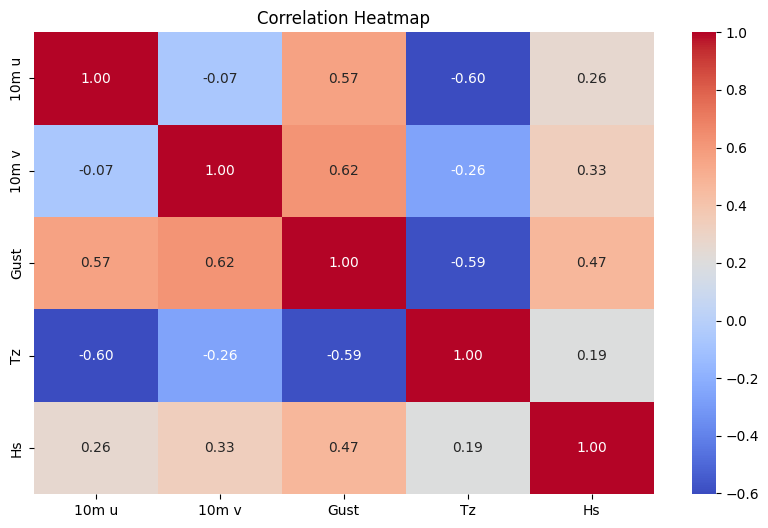

In [ ]:
# Correlation heatmap to visualize correlations between variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

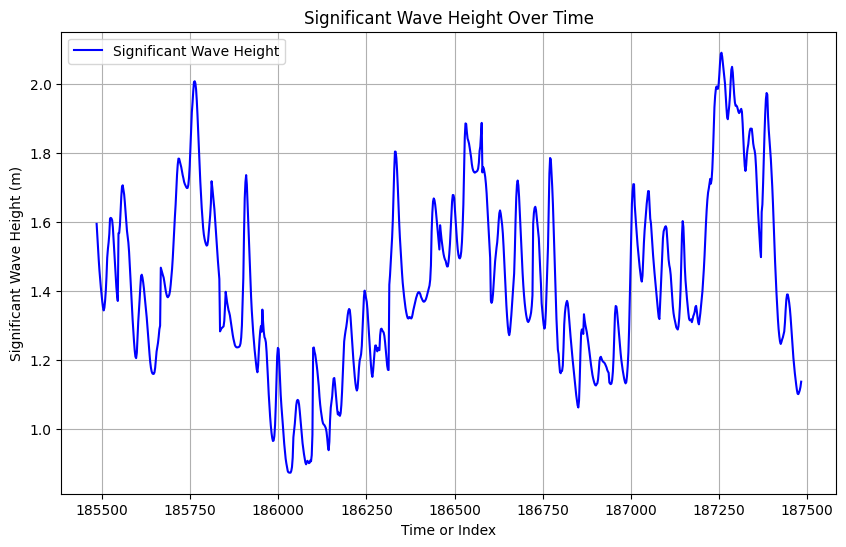

In [ ]:
x=df.index
y=df['Hs']


plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Significant Wave Height', color='blue')
plt.xlabel('Time or Index')
plt.ylabel('Significant Wave Height (m)')
plt.title('Significant Wave Height Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Train and test split.
from sklearn.model_selection import train_test_split
X = df[['10m u', '10m v', 'Gust','Tz']]  # Input features
y = df['Hs']  # Target variable

In [ ]:
X

,10m u,10m v,Gust,Tz
185485,6.021790,-0.419811,8.55243,5.14362
185487,5.268620,-0.329522,6.78170,5.35251
185489,4.164990,-0.873392,5.55243,5.56364
185491,3.222430,-1.105870,4.48782,5.76289
185493,3.495990,-0.847087,3.90863,5.95655
...,...,...,...,...
187475,-0.137806,5.363690,6.13333,5.00083
187477,1.120380,6.157820,6.99668,4.74868
187479,3.091830,6.489110,9.33688,4.59665
187481,4.498040,6.251660,10.34030,4.45895


In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(800, 4)

In [ ]:
X_test.shape

(200, 4)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled  # Output is in numpy array

array([[-1.40209172,  0.19977007, -0.71505343,  0.39698223],
       [-1.52269443,  0.0227628 , -0.14567135,  2.511295  ],
       [ 0.76789948, -1.32093496, -0.72377946,  0.06973376],
       ...,
       [ 1.50180664, -0.15804207,  1.68833651, -1.13619386],
       [-0.30466589,  0.4242167 , -0.29357891,  0.05779105],
       [-2.09484417,  0.3206676 , -0.77133575,  1.02881514]])

In [ ]:
# Apply Random Forest.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)


In [ ]:
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]          # Minimum samples required at each leaf node
}

In [ ]:
# Initialize GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=6, n_jobs=-1, verbose=2)

In [ ]:
# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 6 folds for each of 108 candidates, totalling 648 fits


GridSearchCV(cv=6, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
# Train the Random Forest model with the best hyperparameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_scaled)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 0.11
Mean Squared Error: 0.02
R-squared: 0.73


# Use ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
model=Sequential()


In [ ]:
# Add input layer
model.add(Dense(units=68, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add one or more hidden layers (customize as needed)
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=24, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='linear'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)


In [ ]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,  # You can adjust the number of epochs as needed
    batch_size=32,  # You can adjust the batch size as needed
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping]
)

Epoch 1/200
25/25 [==============================] - 3s 40ms/step - loss: 1.4568 - mae: 1.1157 - val_loss: 0.3978 - val_mae: 0.5362
Epoch 2/200
25/25 [==============================] - 0s 8ms/step - loss: 0.3518 - mae: 0.4852 - val_loss: 0.1443 - val_mae: 0.3027
Epoch 3/200
25/25 [==============================] - 0s 5ms/step - loss: 0.2304 - mae: 0.3861 - val_loss: 0.1204 - val_mae: 0.2676
Epoch 4/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1826 - mae: 0.3467 - val_loss: 0.0801 - val_mae: 0.2193
Epoch 5/200
25/25 [==============================] - 0s 12ms/step - loss: 0.1494 - mae: 0.3148 - val_loss: 0.0702 - val_mae: 0.2044
Epoch 6/200
25/25 [==============================] - 0s 12ms/step - loss: 0.1366 - mae: 0.2987 - val_loss: 0.0674 - val_mae: 0.2035
Epoch 7/200
25/25 [==============================] - 0s 12ms/step - loss: 0.1118 - mae: 0.2653 - val_loss: 0.0544 - val_mae: 0.1839
Epoch 8/200
25/25 [==============================] - 0s 11ms/step - loss: 0.094

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Mean Absolute Error on Test Data: {mae:.2f}")

7/7 [==============================] - 0s 3ms/step - loss: 0.0220 - mae: 0.1140
Mean Absolute Error on Test Data: 0.11


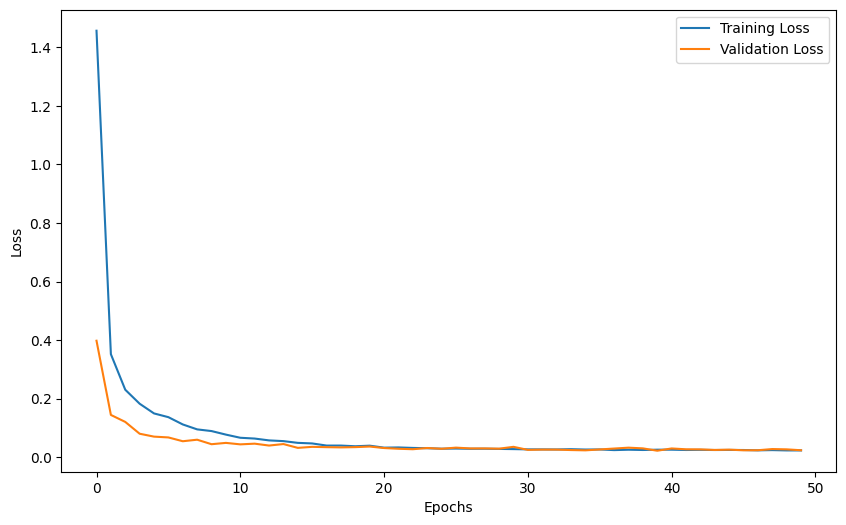

In [ ]:
# Plot training history (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Now working on new data to evaluate my mode performance.
df_=pd.read_csv("/content/10m u - 10m u.csv.csv")

In [ ]:
df_.drop(["Unnamed: 5","#REF!"],axis=1,inplace=True)

In [ ]:
# Select the last 50 data points, excluding the last 1000 data points
selected_data = df_.iloc[:-1000][-50:]

In [ ]:
selected_data.head()

,10m u,10m v,Gust,Tz,Hs
186434,-32767.00000,-32767.00000,-32767.00000,-32767.00000,-32767.00000
186435,2.71089,5.49024,5.84059,5.09294,1.57137
186436,-32767.00000,-32767.00000,-32767.00000,-32767.00000,-32767.00000
186437,3.36538,5.51797,6.98067,5.01028,1.62602
186438,-32767.00000,-32767.00000,-32767.00000,-32767.00000,-32767.00000


In [ ]:
#Drop them.
selected_data.drop_duplicates(keep=False, inplace=True)

In [ ]:
selected_data.shape

(25, 5)

In [ ]:
# Now Split into X and y
X_ = selected_data[['10m u', '10m v', 'Gust','Tz']]  # Input features
y_ = selected_data['Hs']  # Target variable

In [ ]:
X_.shape

(25, 4)

In [ ]:
y_.shape

(25,)

In [ ]:
# StandardScaler
X_ = scaler.transform(X_)

In [ ]:
predictions = model.predict(X_)

1/1 [==============================] - 0s 19ms/step


In [ ]:
# Evaluate the model
mae = mean_absolute_error(predictions, y_)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 0.23


In [ ]:
predictions

array([[1.4226586],
       [1.4743552],
       [1.5228416],
       [1.5755242],
       [1.4164268],
       [1.324032 ],
       [1.2401942],
       [1.2016355],
       [1.2117792],
       [1.1777512],
       [1.2069083],
       [1.2458497],
       [1.2834402],
       [1.2916015],
       [1.297681 ],
       [1.304959 ],
       [1.3100787],
       [1.3124217],
       [1.3163294],
       [1.3549539],
       [1.4245443],
       [1.5413764],
       [1.6091493],
       [1.6967336],
       [1.741156 ]], dtype=float32)

In [ ]:
# Thank you